In [1]:
from typing_extensions import Literal
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, SystemMessage
from typing_extensions import TypedDict
import os
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from IPython.display import Markdown

In [2]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


llm=ChatGroq(model="qwen-2.5-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

AIMessage(content='Hello! How can I assist you today? Feel free to ask any questions or let me know if you need help with anything specific.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 30, 'total_tokens': 58, 'completion_time': 0.14, 'prompt_time': 0.003690021, 'queue_time': 0.048932316, 'total_time': 0.143690021}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-d749f40d-8e63-4c7e-ab6a-0911651b4c69-0', usage_metadata={'input_tokens': 30, 'output_tokens': 28, 'total_tokens': 58})

In [3]:
class State(TypedDict):
    input: str
    userstory : str
    product_owner_review: str
    product_owner_feedback : str
    revise_user_stories :str
    create_design_document :str
    revise_design_document :str
    generated_code :str
    review_generated_code : str
    security_reviewed_code : str
    bug_fixed_code : str
    write_test_cases : str
    fix_security_code : str
    review_test_cases : str
    quality_assurance_testing : str
    fix_test_case_after_review : str
    
    

In [4]:
def User_Input_Requirement(state: State):
    """LLM call to create an initial user requirement"""

    msg = llm.invoke(f"Create an initial user requirement {state['input']}")
    return {"userstory": msg.content}

def Create_User_Stories(state: State):
    """LLM call to create user stories"""

    msg = llm.invoke(f"Create user stories based on  {state['userstory']}")
    return {"product_owner_review": msg.content}


def Product_Owner_Review(state: State):
    """LLM call to decide if the review if the user stories is good or bad"""

    msg = llm.invoke(f"Review user stories based on  {state['product_owner_review']}")
    return {"product_owner_feedback": msg.content}

def Check_Owner_Review(state: State):
    """Gate function to check if the product owner review is good"""

    # Simple check - does the feedback contain "bad" or "needs improvement"
    if "bad" in state["product_owner_feedback"] or "needs improvement" in state["product_owner_feedback"]:
        return "Fail"
    return "Pass"

def Revise_User_Stories(state: State):
    """LLM call to decide if the review the user stories is good or bad"""

    msg = llm.invoke(f"Revise user stories based on  {state['product_owner_feedback']}")
    return {"revise_user_stories": msg.content}

def Create_Design_Document(state: State):
    """LLM call to create a design document"""

    msg = llm.invoke(f"Review user stories based on  {state['product_owner_feedback']}")
    return {"create_design_document": msg.content}

def Revise_Design_Document(state: State):
    """LLM call to revise design document"""

    msg = llm.invoke(f"Review user stories based on  {state['create_design_document']}")
    return {"revise_design_document": msg.content}

def Check_Revised_Design_Document(state: State):
    """Gate function to check if the reviewed design document is good"""

    # Simple check - does the feedback contain "bad" or "needs improvement"
    if "bad" in state["revise_design_document"] or "needs improvement" in state["revise_design_document"]:
        return "Fail"
    return "Pass"

def Generate_Code(state: State):
    """LLM call to create the code"""

    msg = llm.invoke(f"Create a code based on the revised design document {state['revise_design_document']}")
    return {"generated_code": msg.content}

def Code_Review(state: State):
    """LLM call to create the code"""

    msg = llm.invoke(f"Review the code based on the generated code {state['generated_code']}")
    return {"review_generated_code": msg.content}

def Check_Code_Review(state: State):
    """Gate function to check if the reviewed code is good"""

    # Simple check - does the feedback contain "bad" or "needs improvement"
    if "bad" in state["review_generated_code"] or "needs improvement" in state["review_generated_code"]:
        return "Fail"
    return "Pass"

def Security_Review(state: State):
    """LLM call to create the code"""

    msg = llm.invoke(f"Create a code based on the revised design document {state['review_generated_code']}")
    return {"security_reviewed_code": msg.content}

def Bug_Fixes(state: State):
    """LLM call to decide if the code needs bug fixes"""

    msg = llm.invoke(f"Provide bug fixes to code as per the code review {state['review_generated_code']}")
    return {"bug_fixed_code": msg.content}

def Check_Security_Review(state: State):
    """Gate function to check if the security of the reviewed code is good"""

    # Simple check - does the feedback contain "bad" or "needs improvement"
    if "bad" in state["security_reviewed_code"] or "needs improvement" in state["security_reviewed_code"]:
        return "Fail"
    return "Pass"

def Write_Test_Cases(state: State):
    """LLM call to decide if the code needs bug fixes"""

    msg = llm.invoke(f"Provide test cases to the security reviewed code based on the {state['security_reviewed_code']}")
    return {"write_test_cases": msg.content}

def Fix_Code_Review_After_Security(state: State):
    """LLM call to decide if the code needs bug fixes"""

    msg = llm.invoke(f"Fix the code as per the security reviewed code based on the {state['security_reviewed_code']}")
    return {"fix_security_code": msg.content}

def Review_Test_Cases(state: State):
    """LLM call to create the code"""

    msg = llm.invoke(f" Review the test cases based on the {state['security_reviewed_code']}")
    return {"review_test_cases": msg.content}

def Check_Test_Cases(state: State):
    """Gate function to check if the review of test cases is good"""

    # Simple check - does the feedback contain "bad" or "needs improvement"
    if "bad" in state["review_test_cases"] or "needs improvement" in state["review_test_cases"]:
        return "Fail"
    return "Pass"

def QA_Testing(state: State):
    """LLM call to do the quality assurance testing"""

    msg = llm.invoke(f"Conduct a quality assuarance testing based on  {state['review_test_cases']}")
    return {"quality_assurance_testing": msg.content}

def Fix_Test_Cases_After_Review(state: State):
    """LLM call to decide if the code needs bug fixes"""

    msg = llm.invoke(f"Provide fixes to the code after the review based on the {state['review_test_cases']}")
    return {"fix_test_case_after_review": msg.content}






In [5]:
workflow = StateGraph(State)

# Add nodes
workflow.add_node("User_Input_Requirement", User_Input_Requirement)
workflow.add_node("Create_User_Stories", Create_User_Stories)
workflow.add_node("Product_Owner_Review", Product_Owner_Review)
workflow.add_node("Create_Design_Document", Create_Design_Document)
workflow.add_node("Revise_User_Stories", Revise_User_Stories)
workflow.add_node("Revise_Design_Document", Revise_Design_Document)
workflow.add_node("Generate_Code",Generate_Code)
workflow.add_node("Code_Review",Code_Review)
workflow.add_node("Security_Review",Security_Review)
workflow.add_node("Bug_Fixes",Bug_Fixes)
workflow.add_node("Write_Test_Cases",Write_Test_Cases)
workflow.add_node("Fix_Code_Review_After_Security",Fix_Code_Review_After_Security)
workflow.add_node("Review_Test_Cases",Review_Test_Cases)
workflow.add_node("QA_Testing",QA_Testing)
workflow.add_node("Fix_Test_Cases_After_Review",Fix_Test_Cases_After_Review)







In [6]:
# Add edges to connect nodes
workflow.add_edge(START, "User_Input_Requirement")
workflow.add_edge("User_Input_Requirement", "Create_User_Stories")
workflow.add_edge("Create_User_Stories", "Product_Owner_Review")
workflow.add_conditional_edges("Product_Owner_Review",Check_Owner_Review,{"Fail":"Revise_User_Stories","Pass":"Create_Design_Document"})
workflow.add_edge("Revise_User_Stories", "Create_User_Stories")
workflow.add_edge("Create_Design_Document", "Revise_Design_Document")
workflow.add_conditional_edges("Revise_Design_Document",Check_Revised_Design_Document,{"Fail":"Create_Design_Document","Pass":"Generate_Code"})
workflow.add_edge("Generate_Code", "Code_Review")
workflow.add_conditional_edges("Code_Review",Check_Code_Review,{"Fail":"Bug_Fixes","Pass":"Security_Review"})
workflow.add_edge("Bug_Fixes", "Generate_Code")
workflow.add_conditional_edges("Security_Review",Check_Security_Review,{"Fail":"Fix_Code_Review_After_Security","Pass":"Write_Test_Cases"})
workflow.add_edge("Fix_Code_Review_After_Security", "Generate_Code")
workflow.add_edge("Write_Test_Cases","Review_Test_Cases")
workflow.add_conditional_edges("Review_Test_Cases",Check_Security_Review,{"Fail":"Fix_Test_Cases_After_Review","Pass":"QA_Testing"})
workflow.add_edge("Fix_Test_Cases_After_Review","Write_Test_Cases")
workflow.add_edge("QA_Testing",END)









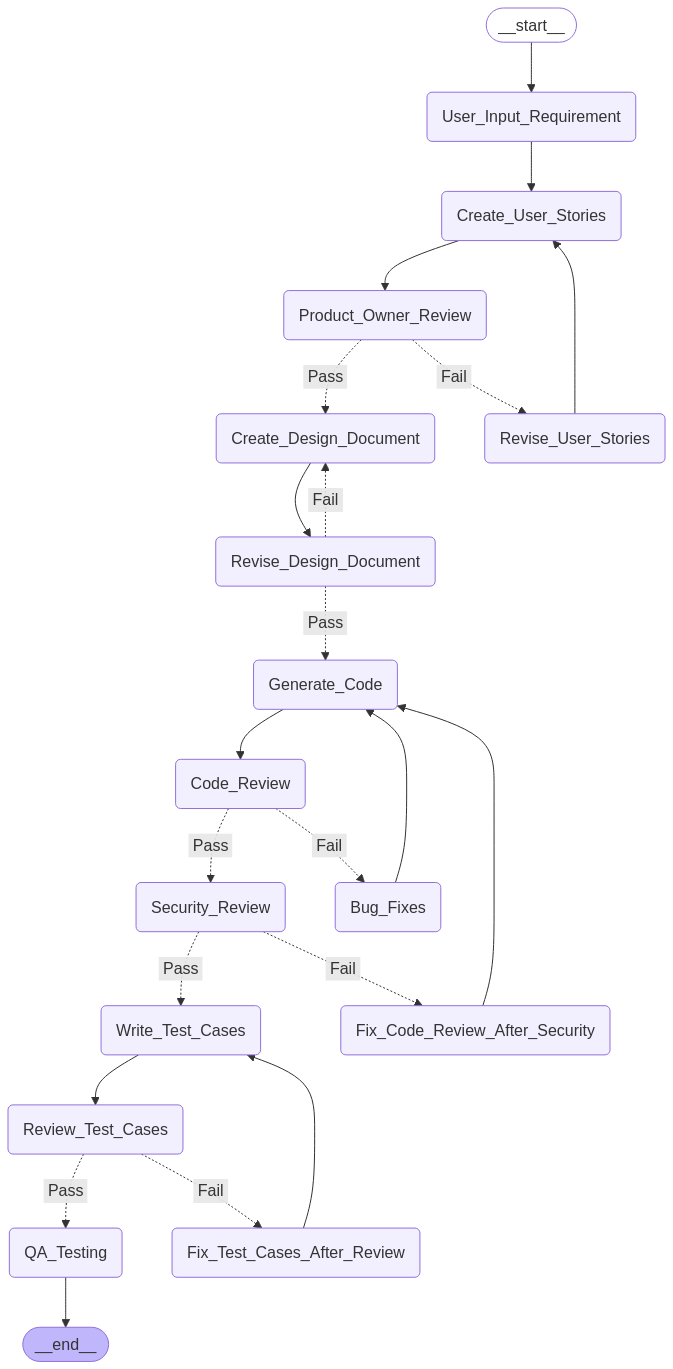

In [7]:
# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

In [8]:
# Invoke
state = chain.invoke({"input": "create a banking database"})

In [10]:
Markdown(state["quality_assurance_testing"])

To perform a quality assurance testing based on the provided review and enhancements, we need to ensure that the system meets the necessary standards for functionality, security, performance, and usability. Below is a structured approach to quality assurance testing for the transaction monitoring system with fraud detection and alerting mechanisms:

### Quality Assurance Testing Plan

#### 1. Functional Testing
- **Test Cases for Machine Learning Model**:
  - Validate that the model correctly handles categorical data through encoding.
  - Ensure the model can be trained with the mock `is_fraud` column and makes predictions on new data.
  - Test the model's accuracy with a set of known fraudulent and non-fraudulent transactions.
- **Email Sending Functionality**:
  - Verify that emails are sent successfully using `smtplib.SMTP` with `starttls()`.
  - Test error handling by simulating network failures or invalid SMTP credentials.
- **Transaction Categorization**:
  - Confirm that transactions are accurately categorized by merchant and their amounts are correctly summed.
  - Test categorization with different transaction data, including edge cases like zero amounts or null values.
- **Alert Conditions and Customization**:
  - Validate that alerts are triggered correctly under predefined conditions.
  - Test user customization options for alert preferences, if implemented.

#### 2. Security Testing
- **Data Encryption**:
  - Ensure that sensitive data, such as SMTP credentials, are encrypted and securely stored.
  - Test the system's ability to handle and protect sensitive data against unauthorized access.
- **Secure Communication**:
  - Verify that all network communications, especially those involving sensitive data, are encrypted and secure.
  - Test the system's behavior in the presence of security vulnerabilities like man-in-the-middle attacks.

#### 3. Performance Testing
- **Scalability Testing**:
  - Assess the system's performance under varying transaction volumes to ensure it can handle peak loads.
  - Test the transaction categorization and alert system under high load conditions to ensure timely processing.
- **Resource Utilization**:
  - Monitor CPU, memory usage, and database performance during system operations to ensure efficient resource use.

#### 4. Usability Testing
- **User Interface and Experience**:
  - If there is a user interface, test its responsiveness and ease of use.
  - Ensure that alerts and notifications are clear and understandable.
- **Documentation and Help Resources**:
  - Conduct a usability test on the documentation and user manual to ensure they are clear and useful.
  - Test whether the documentation adequately explains the system's functionality and how to handle various scenarios.

#### 5. Integration Testing
- **Interactions Between Components**:
  - Ensure that the machine learning model, email sending function, transaction categorization, and alert system can work together without conflicts.
  - Test the integration with external services or databases to ensure seamless operations.

#### 6. Security Audits
- **Penetration Testing**:
  - Conduct regular penetration testing to identify and mitigate potential security vulnerabilities.
- **Compliance Checks**:
  - Ensure compliance with relevant regulations and standards (e.g., GDPR, PCI DSS).

### Conclusion
By systematically addressing these areas through a thorough quality assurance testing process, you can ensure that the transaction monitoring system with fraud detection and alerting mechanisms is reliable, secure, and user-friendly. This approach will help in identifying any potential issues early in the development cycle, thus facilitating timely corrections and enhancements to meet the desired quality standards.

In [ ]:
Markdown(state["security_reviewed_code"])

Given the complexity and scope of the requirements, let's break down the enhancements into a modular approach, focusing on Python code as an example. We'll create a simplified version of a banking system that includes some of the enhancements mentioned, such as security enhancements, data validation, and an enhanced alert system. This example will be part of a larger system, so the focus will be on the core banking functionalities and enhancements.

First, let's define a basic structure for the banking system:

```python
import hashlib
import datetime
import smtplib
from email.mime.text import MIMEText

class BankAccount:
    def __init__(self, account_number, owner, balance=0):
        self.account_number = self._encrypt(account_number)
        self.owner = owner
        self.balance = balance
        self.transactions = []
        self.alerts = []

    def _encrypt(self, data):
        # Simple encryption for demonstration purposes
        return hashlib.sha256(data.encode()).hexdigest()

    def deposit(self, amount):
        if amount <= 0:
            raise ValueError("Deposit amount must be positive")
        self.balance += amount
        self.transactions.append({
            'type': 'deposit',
            'amount': amount,
            'date': str(datetime.datetime.now())
        })

    def withdraw(self, amount):
        if amount <= 0 or amount > self.balance:
            raise ValueError("Invalid withdrawal amount")
        self.balance -= amount
        self.transactions.append({
            'type': 'withdraw',
            'amount': amount,
            'date': str(datetime.datetime.now())
        })

    def transfer(self, to_account, amount):
        if amount <= 0 or amount > self.balance:
            raise ValueError("Invalid transfer amount")
        self.withdraw(amount)
        to_account.deposit(amount)
        self.transactions.append({
            'type': 'transfer',
            'amount': amount,
            'to': to_account.account_number,
            'date': str(datetime.datetime.now())
        })

    def check_alerts(self, transaction):
        if transaction['amount'] > 1000:
            alert = f"Large transaction alert: {transaction['amount']} on {transaction['date']}."
            self.alerts.append(alert)
            self.notify_user(alert)

    def notify_user(self, message):
        # Placeholder for sending an email, SMS, or push notification
        print(f"Notification sent: {message}")

    def link_accounts(self, other_account):
        if self.owner != other_account.owner:
            raise ValueError("Accounts must belong to the same owner to be linked")
        # Placeholder for linking logic
        print(f"Accounts {self.account_number} and {other_account.account_number} are linked")

# Example usage
account1 = BankAccount("123456789", "Alice")
account2 = BankAccount("987654321", "Alice")

account1.deposit(1500)
account1.withdraw(500)
account1.transfer(account2, 1000)

# Check alerts after each transaction
account1.check_alerts(account1.transactions[-1])
account1.link_accounts(account2)
```

### Explanation of Enhancements:

1. **Security Enhancements**: Implemented a simple encryption method for sensitive data like account numbers using SHA256.
2. **Data Validation**: Added checks for transaction validity in `deposit`, `withdraw`, and `transfer` methods.
3. **Alert System**: Enhanced the `check_alerts` method to trigger alerts for large transactions and notify the user.
4. **Account Linking**: Added a simple `link_accounts` method with a validation check to ensure accounts belong to the same owner.
5. **Error Handling**: Basic error handling is implemented for invalid operations like insufficient funds or incorrect transaction amounts.

This example provides a foundation for further enhancements and integration with more complex systems, such as a database for persistent storage, more sophisticated encryption, and a full-fledged user interface.

In [ ]:
Markdown(state["security_reviewed_code"])


The provided code snippet and the summary of enhancements offer a comprehensive starting point for building a transaction alert system with additional security and usability features. Here's a breakdown of the components and how they contribute to the overall system:

### Security Enhancements
- **Authentication and Authorization**: The use of Flask-Login adds a layer of security by managing user sessions securely. The login route checks if a user exists and logs them in, setting a session variable to keep track of the logged-in user.
- **Data Validation**: Flask-WTF is used to create a login form that validates input data, which helps prevent SQL injection and ensures that the data conforms to expected formats (e.g., email validation).

### Scalability and Reliability
- **Asynchronous Processing**: While not directly implemented in the provided code, the suggestion to use Celery for asynchronous task management is a good practice for real-time systems. Celery can handle tasks such as sending notifications in the background, which improves the responsiveness of the application.
- **Database Scalability**: Although SQLite is used in the example for simplicity, the document suggests moving to PostgreSQL for production environments, which supports larger datasets and more complex queries efficiently.

### User Experience Enhancements
- **Real-Time Notifications**: The system could be further enhanced with real-time notification delivery using WebSockets or a service like Firebase Cloud Messaging (FCM). This would allow instant alerts to users as transactions occur.
- **API Documentation**: Using Swagger or similar tools for API documentation would make the API easier to use for developers integrating with this system.

### Code Explanation
- **Flask and SQLAlchemy Setup**: The application uses Flask as its web framework and SQLAlchemy for ORM (Object-Relational Mapping) to interact with the SQLite database.
- **User and Transaction Models**: The `User` model is linked to `Notification` and `Transaction` models through SQLAlchemy's relationship system. This allows for easy querying and management of user-related data.
- **Login and Transaction Routes**: The login route validates user credentials and logs the user in, while the transaction route requires authentication and creates a new transaction and associated notification.

### Next Steps for Production
To move this system towards a production environment, consider the following steps:
1. **Enhance Authentication**: Implement more robust authentication mechanisms, such as OAuth2 or JWT (JSON Web Tokens), and secure password storage.
2. **Error Handling**: Improve error handling to manage exceptions gracefully, providing meaningful error messages and ensuring the system remains stable.
3. **Testing**: Write unit tests and integration tests to ensure the application behaves as expected.
4. **Deployment**: Consider deploying the application using a PaaS (Platform as a Service) like Heroku, or a more customizable solution like Docker containers orchestrated with Kubernetes.

This setup provides a solid foundation for a transaction alert system with room for expansion and improvement as needed.

In [ ]:
Markdown(state["generated_code"])

Based on the revised design document and the additional considerations provided, let's outline a simplified code structure that addresses some of these requirements. We'll focus on a Python-based backend implementation using Flask for the web framework, SQLAlchemy for ORM, and Flask-Security for handling user authentication and authorization.

### Prerequisites
- Python 3.8+
- Flask
- Flask-Security
- SQLAlchemy
- Flask-SQLAlchemy
- Flask-Migrate
- Flask-Mail (for email notifications)

### Step 1: Project Setup
First, set up a virtual environment and install the necessary packages.

```bash
python -m venv env
source env/bin/activate  # On Windows use `env\Scripts\activate`
pip install Flask Flask-Security Flask-SQLAlchemy Flask-Migrate Flask-Mail
```

### Step 2: Application Structure
Create the following directory structure for your project:

```
bank_system/
│
├── app/
│   ├── __init__.py
│   ├── models.py
│   ├── forms.py
│   ├── views.py
│   └── security.py
│
├── migrations/
│
├── config.py
├── run.py
└── requirements.txt
```

### Step 3: Configuration
Create `config.py` for configuration settings.

```python
import os

class Config:
    SECRET_KEY = os.environ.get('SECRET_KEY', 'your_secret_key')
    SQLALCHEMY_DATABASE_URI = os.environ.get('SQLALCHEMY_DATABASE_URI', 'sqlite:///bank_system.db')
    SQLALCHEMY_TRACK_MODIFICATIONS = False
    SECURITY_PASSWORD_SALT = os.environ.get('SECURITY_PASSWORD_SALT', 'your_salt')
    SECURITY_REGISTERABLE = True
    SECURITY_RECOVERABLE = True
    SECURITY_CHANGEABLE = True
    MAIL_SERVER = 'smtp.gmail.com'
    MAIL_PORT = 587
    MAIL_USE_TLS = True
    MAIL_USERNAME = os.environ.get('MAIL_USERNAME')
    MAIL_PASSWORD = os.environ.get('MAIL_PASSWORD')
```

### Step 4: Application Initialization
Create `app/__init__.py` for application initialization.

```python
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from flask_security import Security, SQLAlchemyUserDatastore, UserMixin, RoleMixin

app = Flask(__name__)
app.config.from_object('config.Config')

db = SQLAlchemy(app)

# Define models
class Role(db.Model, RoleMixin):
    id = db.Column(db.Integer(), primary_key=True)
    name = db.Column(db.String(80), unique=True)
    description = db.Column(db.String(255))

class User(db.Model, UserMixin):
    id = db.Column(db.Integer, primary_key=True)
    email = db.Column(db.String(255), unique=True)
    password = db.Column(db.String(255))
    active = db.Column(db.Boolean())
    confirmed_at = db.Column(db.DateTime())
    roles = db.relationship('Role', secondary='user_roles', backref=db.backref('users', lazy='dynamic'))

# Setup Flask-Security
user_datastore = SQLAlchemyUserDatastore(db, User, Role)
security = Security(app, user_datastore)

from app import views
```

### Step 5: Views and Forms
Create `app/views.py` for handling views.

```python
from flask import render_template, redirect, url_for
from flask_security import login_required, current_user
from . import app, security

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/profile')
@login_required
def profile():
    return render_template('profile.html', user=current_user)
```

### Step 6: Running the Application
Create `run.py` to run the application.

```python
from app import app

if __name__ == "__main__":
    app.run(debug=True)
```

### Step 7: Migrations
Initialize Flask-Migrate to manage database migrations.

```bash
export FLASK_APP=run.py
flask db init
flask db migrate -m "Initial migration."
flask db upgrade
```

### Step 8: Running the Application
Finally, you can run the application using:

```bash
python run.py
```

### Next Steps
- Implement detailed models and relationships for roles and users.
- Add forms and templates for user interaction.
- Implement additional security measures and compliance checks.
- Integrate additional features such as transaction limits, multi-currency support, and real-time analytics.

This setup provides a solid foundation for building a secure and user-friendly banking system, adhering to the user stories and acceptance criteria provided.